# Plotting normal distribution and cummulative distribution by hand

###### source: https://pt.wikipedia.org/wiki/Distribui%C3%A7%C3%A3o_normal

This document is used to test some formulas of the normal distribution, although exists library functions that automatically do that for me. I coded the formula so I could have a visual understanding of what it represents in practice. Some overflow may occur, so the values maybe not be as precise as they should. This graph is also interactable, so if you want to test just run all cels and hover the graph

In [3]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import math
from scipy.integrate import quad
import seaborn as sns

In [4]:
def normal(x, u, sigma): 
    return 1/math.sqrt(2 * math.pi * math.pow(sigma, 2) * np.exp(math.pow(((x - u)/sigma), 2)))

def integral(x, u, sigma): 
    return quad(normal, -np.inf, x, args=(u, sigma))

In [5]:
u = 0
sigma = 4

cummulative = np.vectorize(integral)
normal = np.vectorize(normal)

cummulative_values, err = cummulative(np.arange(-20, 21), u, sigma)
normal_values = normal(np.arange(-20, 21), u, sigma)

<ipython-input-4-e11eeb54a82c>:2: RuntimeWarning: overflow encountered in exp
  return 1/math.sqrt(2 * math.pi * math.pow(sigma, 2) * np.exp(math.pow(((x - u)/sigma), 2)))
<ipython-input-4-e11eeb54a82c>:2: RuntimeWarning: overflow encountered in double_scalars
  return 1/math.sqrt(2 * math.pi * math.pow(sigma, 2) * np.exp(math.pow(((x - u)/sigma), 2)))
C:\Users\Bitzen-tech\anaconda3\lib\site-packages\numpy\lib\function_base.py:2192: RuntimeWarning: overflow encountered in ? (vectorized)
  outputs = ufunc(*inputs)


<IPython.core.display.Javascript object>


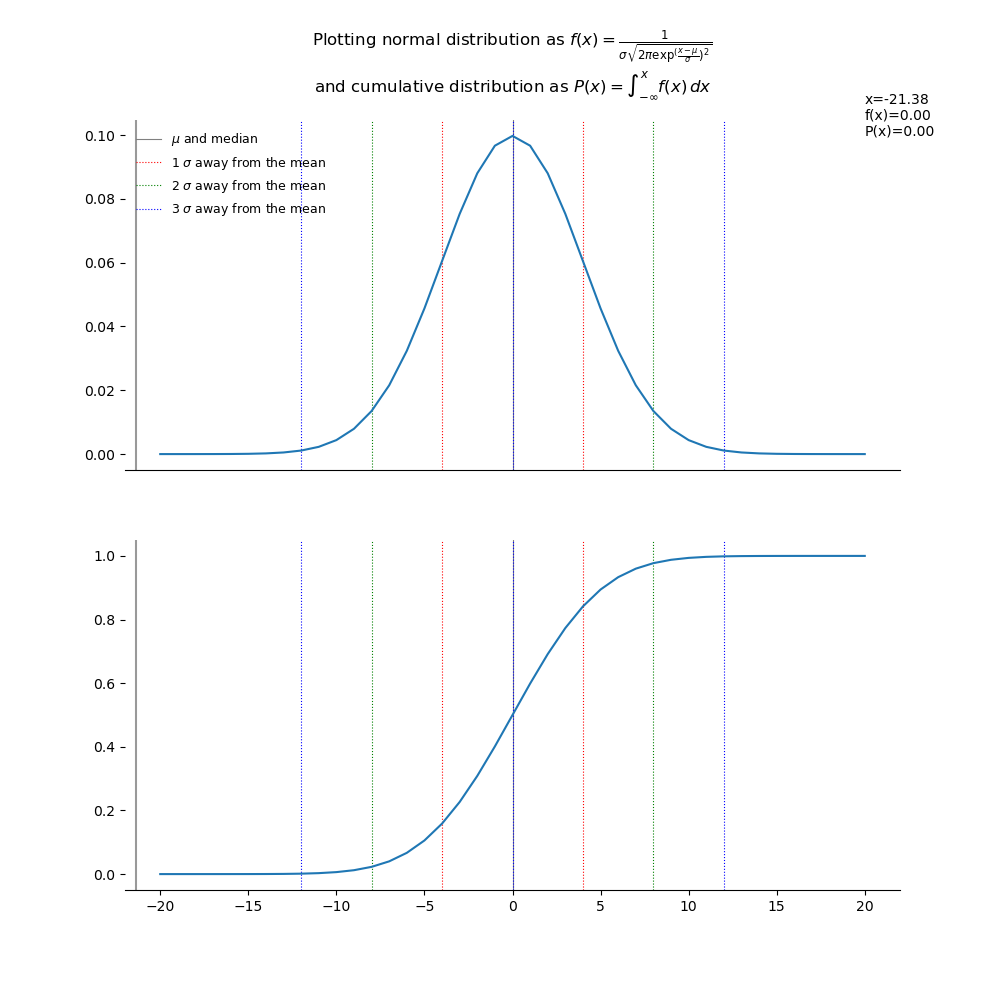

9

In [6]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

sns.despine()

class Cursor(object):
    def __init__(self, ax):
        self.ax = ax[0]
        self.lx = self.ax.axvline(color='k', alpha=0.4)
        self.lx2 = ax[1].axvline(color='k', alpha=0.4)
        self.txt = self.ax.text(20, normal_values[20], "")

    # Event update x pos of the line
    def mouse_move(self, event):
        if not event.inaxes:
            return
        
        x, y = event.xdata, event.ydata
        self.lx.set_xdata(x)
        self.lx2.set_xdata(x)
        self.txt.set_text(f"x={x:1.2f}\nf(x)={normal(x, u, sigma):1.2f}\nP(x)={integral(x, u, sigma)[0]:1.2f}")
        
        plt.draw()

colors = ['red', 'green', 'blue']

for axis in ax:
    axis.axvline(u, color='gray', linestyle='solid', linewidth=0.8, label=r'$\mu$ and median')
    axis.set_xticks([])
    axis.spines['left'].set_visible(False)
    for i in range(-3, 4, 1):
        axis.axvline(u + i*sigma, color=colors[abs(i)-1], linestyle='dotted', linewidth=0.8, label=(i > 0 and f'{i} $\sigma$ away from the mean') or '')
    
ax[0].legend(frameon=False, loc=2, fontsize=9)
ax[1].set_xticks(np.arange(-20, 21, 5))
ax[0].set_title(r"Plotting normal distribution as $f(x) = \frac{1}{\sigma\sqrt{2\pi\exp^(\frac{x - \mu}{\sigma})^2}}$" "\n" "and cumulative distribution as $P(x) = \int_{-\infty}^x f(x) \, dx$",  pad=20)

ax[0].plot(np.arange(-20, 21), normal_values)
ax[1].plot(np.arange(-20, 21), cummulative_values)

cursor = Cursor(ax)
plt.connect('motion_notify_event', cursor.mouse_move)